# Step 1 Data Preprocessing

In this cell, I will load in College Scorecard data. Count data sample number and total feature number.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

data = pd.read_csv('Most+Recent+Cohorts+(All+Data+Elements).csv')
print 'data set read successfully!'
print len(data)

feature_col = list(data.columns)
print len(feature_col)
#print feature_col
display(data.head(3))

C:\Users\LiHe\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (412,506,518,520,523,527,532,533,551,553,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,

data set read successfully!
7804
1728


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_YR8_N,NOPELL_YR8_N,LOAN_YR8_N,NOLOAN_YR8_N,FIRSTGEN_YR8_N,NOT1STGEN_YR8_N,REPAY_DT_MDN,SEPAR_DT_MDN,REPAY_DT_N,SEPAR_DT_N
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,1089,247,1225,111,485,657,379852,379852,1788,2182
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,1440,1010,2236,214,847,1365,379852,379852,3681,4495
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,99,46,PrivacySuppressed,PrivacySuppressed,70,57,19524,19467,266,406


There are 7804 samples and 1728 features in raw data set. From the table above, we can see that first 10 columns are obviously irrelevent nonumerical features. After reading DataDictionary carefully, I find that all featuers related to completion rate contains key words 'C150' or 'C200', correspond to two different completion defination.  
So in next cell, I drop the first 10 columns of data, and split columns related to completion rate away from raw data set.

In [2]:
feature_C150 = []
feature_C200 = []

for feature in feature_col:
    #if 'RET' in feature:
        #feature_RET.append(feature)
    if 'C150' in feature:
        feature_C150.append(feature)
    if 'C200' in feature:
        feature_C200.append(feature)


### pick up several representative y used as labels
y_C150_4_POOLED = data['C150_4_POOLED']
y_C150_L4_POOLED = data['C150_L4_POOLED']
y_C200_4_POOLED = data['C200_4_POOLED']
y_C200_L4_POOLED = data['C200_L4_POOLED']  ## completion rate

data.drop(feature_C150 + feature_C200,axis = 1,inplace=True)

### modeling will be focused on y_C_150_4_POOLED
valid_sample = y_C150_4_POOLED.notnull()

data_C150 = data[valid_sample]

X_all = data_C150
y_all = y_C150_4_POOLED.dropna()
print len(X_all),'\n',len(y_all)
print len(X_all.columns)

### remove first 10 columns
feature_col = list(X_all.columns)
nonNumericalFeature = feature_col[:10]
X_all.drop(nonNumericalFeature,axis = 1,inplace = True)

2472 
2472
1688


C:\Users\LiHe\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In next cell, I fill missing data with mean value of each column. During this step, I figure out numerical data in several columns are strings. This trouble is fixed manually.

In [3]:
###  fill missing data with mean value of each column, if this doesn't work, fill missing data with 0

X_raw = X_all.replace(['PrivacySuppressed'],np.nan)  ### treat string 'PrivacySuppressed' also as missing numbers

#Here, X_raw.mean() only return 270 elements. But len(X_raw.columns) > 1600
#Waste 4 hours to find data type of data time of many numerical features are acturally 'string' T_T 

def FixData_manually(X):
    '''
    Don't standarize here, there will be a lot 0/0 problem
    '''
    feature_loc = X.columns
    X_fixed = pd.DataFrame(columns = feature_loc)
    for col, col_data in X.iteritems():
        #print col
        data_tmp = [float(value) for value in col_data if str(value)[0].isdigit()]
        #print data_tmp
        data_tmp = np.array(data_tmp)
        ave_tmp = np.mean(data_tmp)
        #print ave_tmp
        #std_tmp = np.std(data_tmp)
        #range_tmp = data_tmp.max() - data_tmp.min()
        
        col_data2 = []
        for value in col_data:
            if str(value)[0].isdigit():
                col_data2.append(float(value))
            else:
                col_data2.append(float(ave_tmp)) ### replace NaN data points with mean value of this column
        
        col_data2 = np.array(col_data2)
        #col_data2 = col_data2 - float(ave_tmp)
        #col_data2 = col_data2/float(range_tmp)
        X_fixed[col] = col_data2
        
    return X_fixed
    
X_fixed = FixData_manually(X_raw)
X_fixed = X_fixed.fillna(0)
print len(X_fixed.columns)
print len(X_fixed.mean())

C:\Users\LiHe\Anaconda2\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


1678
1678


## Plot figure used in Exploratory Visualization

### 1. distribution of feature mean

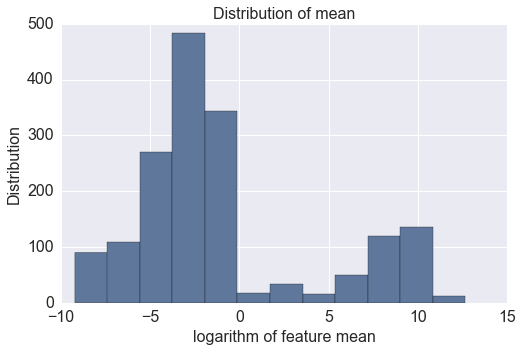

In [4]:
ave = X_fixed.mean()
ave = ave+0.0001
log_ave = np.log(ave)

import seaborn as sns
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 5) } )

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(log_ave,bins = 12)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.set_xlim([0,1])
#ax.set_ylim([0,1])
ax.set_xlabel('logarithm of feature mean',fontsize=16)
ax.set_ylabel('Distribution',fontsize=16)
ax.set_title('Distribution of mean',fontsize=16)
plt.show()
#plt.savefig('mean.jpg')
fig.savefig('mean.png', dpi=75)

### distribution of feature std

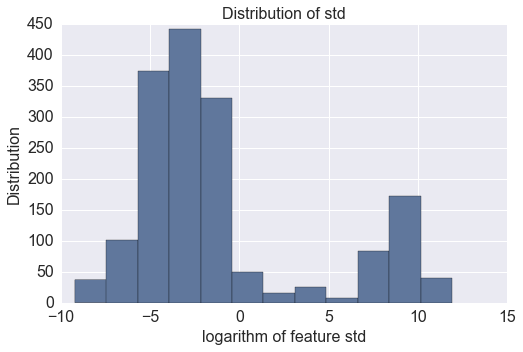

In [5]:
dev = X_fixed.std()
dev = dev+0.0001
log_dev = np.log(dev)

import seaborn as sns
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 5) } )

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(log_dev,bins = 12)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.set_xlim([0,1])
#ax.set_ylim([0,1])
ax.set_xlabel('logarithm of feature std',fontsize=16)
ax.set_ylabel('Distribution',fontsize=16)
ax.set_title('Distribution of std',fontsize=16)
plt.show()
#plt.savefig('mean.jpg')
fig.savefig('std.png', dpi=75)

### distribution of completion rate

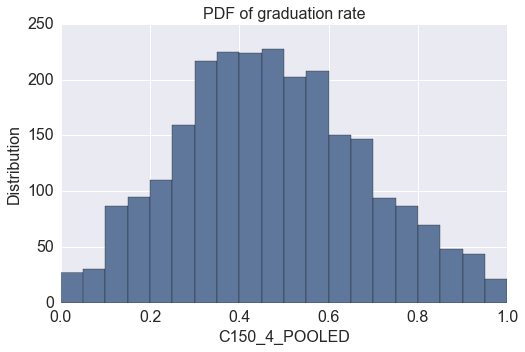

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y_all,bins = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.set_xlim([0,1])
#ax.set_ylim([0,1])
ax.set_xlabel('C150_4_POOLED',fontsize=16)
ax.set_ylabel('Distribution',fontsize=16)
ax.set_title('PDF of graduation rate',fontsize=16)
plt.show()
#plt.savefig('mean.jpg')
fig.savefig('PDF of label.png', dpi=75)

# Continue Data preprocessing
Do feature standerization. Remove outliers.

In [7]:
### apply feature standarization, first try Standard scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_fixed)
X_scaled = pd.DataFrame(data = X_scaled,columns = X_fixed.columns)
#display(X_scaled.describe())

### remove outlier in y_all
y_all.index = range(0,len(y_all))

Q1 = np.percentile(y_all,25)
Q3 = np.percentile(y_all,75)
step = 1.5*(Q3 - Q1)

Lowthresh = np.max([Q1 - step,0])
Highthresh = np.min([Q3+step,1])

outlier_points = y_all[~((y_all >= Lowthresh) & (y_all <= Highthresh))]
outliers = outlier_points.index.values.astype('int64')

X_good = X_scaled.drop(X_fixed.index[outliers]).reset_index(drop = True)
y_good = y_all.drop(y_all.index[outliers]).reset_index(drop = True)
###
print 'Data set are ready for training'

Data set are ready for training


Do Train-test-split.

In [8]:
### To Do: Train-test split
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_RET_FT4, test_size = 0.25, random_state=26)
X_train, X_test, y_train, y_test = train_test_split(X_good, y_good, test_size = 0.25, random_state=30)
print len(X_train)

1854


# Step 2 Make benchmarks
In next cell, I trained a linear regression model with L2 norm regularization term, called ridge regression. Since # of training sample points is 1632, but # of features is 1674, I expect there exists horrible overfitting problem. To deal with it, I choose a large regularization factor Alpha, say, up to 100.

In [9]:
### Use  ridge regression result as benchmarks
from sklearn import linear_model
from sklearn.metrics import make_scorer,r2_score,mean_squared_error
from sklearn.grid_search import GridSearchCV
rr_bench = linear_model.Ridge()
parameters = {'alpha':np.logspace(1,2,5)}
#parameters = {'alpha':np.linspace(0,10,20)}

### use 10-fold cross validation to choose best alpha
grid_rr = GridSearchCV(rr_bench, parameters,scoring = 'r2',cv = 10)
grid_rr.fit(X_train,y_train)
rr_bench = grid_rr.best_estimator_

print rr_bench.get_params()
    
y_pred = rr_bench.predict(X_train)
print 'r-square on training set: ',r2_score(y_train,y_pred)
y_pred = rr_bench.predict(X_test)
print 'r-square on test set: ',r2_score(y_test,y_pred)  

{'normalize': False, 'fit_intercept': True, 'max_iter': None, 'random_state': None, 'tol': 0.001, 'copy_X': True, 'alpha': 100.0, 'solver': 'auto'}
r-square on training set:  0.920852053779
r-square on test set:  0.638382455578


Visualize how well y has been predicted.

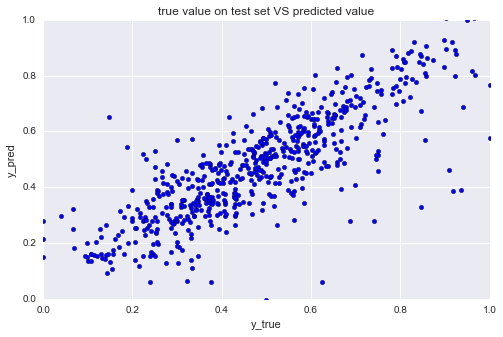

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test,y_pred)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('y_true')
ax.set_ylabel('y_pred')
ax.set_title('true value on test set VS predicted value')
plt.show()

# Step 3 feature selection

### Univariate feature selection
Select 30 features using SelectKBest with scoring_func = f_regression. Then train a ridge regressor on simplified training set. Compare r2 score with benchmarks.

In [11]:
from sklearn.feature_selection import SelectKBest,f_regression
import time

### count running time
start_ufs = time.clock()

### select 30 features
selector_ufs = SelectKBest(f_regression,30)
selector_ufs.fit(X_train,y_train)

mask1 = selector_ufs.get_support()

feature_col = X_train.columns
feature_selected = feature_col[mask1]

X_train_selected = X_train[feature_selected]
X_test_selected = X_test[feature_selected]

end_ufs = time.clock()
print "running time: %f s" % (end_ufs - start_ufs)


### train a ridge regressor based on simplified data set
regressor1 = linear_model.Ridge(alpha = 10)
#parameters = {'alpha':np.logspace(-1,1,10)}
#grid_reg1 = GridSearchCV(regressor1, parameters,scoring = 'r2',cv = 10)
#grid_reg1.fit(X_train_selected,y_train)

#regressor1 = grid_reg1.best_estimator_
regressor1.fit(X_train_selected,y_train)
print regressor1.get_params()

y_pred = regressor1.predict(X_train_selected)
print 'r-square on training set: ',r2_score(y_train,y_pred)
y_pred = regressor1.predict(X_test_selected)
print 'r-square on test set: ',r2_score(y_test,y_pred) 

running time: 0.104825 s
{'normalize': False, 'fit_intercept': True, 'max_iter': None, 'random_state': None, 'tol': 0.001, 'copy_X': True, 'alpha': 10, 'solver': 'auto'}
r-square on training set:  0.66565397593
r-square on test set:  0.612937039548


### Recursive feature elimination
Select 30 features with RFE. Use ridge regression as external estimator. This step will take quite a long time.

In [12]:
from sklearn.feature_selection import RFECV,RFE

start_rfe = time.clock()

estimator = linear_model.Ridge(alpha = 10)
selector_rfe = RFE(estimator,n_features_to_select = 30,step = 1)
selector_rfe = selector_rfe.fit(X_train, y_train)

mask2 = selector_rfe.support_
feature_selected2 = feature_col[mask2]  ### return selected features
print len(feature_selected2)

end_rfe = time.clock()
print "running time: %f s" % (end_rfe - start_rfe)

y_pred = selector_rfe.predict(X_train)
print 'r-square on training set: ',r2_score(y_train,y_pred)
y_pred = selector_rfe.predict(X_test)
print 'r-square o test set: ',r2_score(y_test,y_pred)

30
running time: 312.241780 s
r-square on training set:  0.740552577792
r-square o test set:  0.690564178944


### Lasso
Use linear_model.Lasso to train a regressor on entire data set. After training, only relevent features have non-zero weights. So it can also be regarded as a kind of feature selection algorithm.

In [13]:
### use lasso instead of lassocv
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV,Lasso

start_lasso = time.clock()

#reg_lasso = Lasso(alpha = 0.05, max_iter=5000)
reg_lasso = Lasso(alpha = 0.021,max_iter = 2000)
reg_lasso.fit(X_train,y_train)

#print reg_lasso.coef_

end_lasso = time.clock()
print "running time: %f s" % (end_lasso - start_lasso)

#y_pred = reg_lasso.predict(X_train)
#print 'r-square on training set: ',r2_score(y_train,y_pred)
#y_pred = reg_lasso.predict(X_test)
#print 'r-square on test set: ',r2_score(y_test,y_pred)

running time: 0.636114 s


Store features with non- zero weights in feature_selected3

In [14]:
index = np.abs(reg_lasso.coef_) > 0
weights = reg_lasso.coef_[index]
print np.sum(index)
feature_selected3 = feature_col[index]

30


Also train a ridge regression model. This is for sake of making comparation with the other two algorithms.

In [15]:
#X_train_selected = selector_ufs.transform(X_train)
X_train_selected = X_train[feature_selected3]
X_test_selected = X_test[feature_selected3]

### train a regressor based on simplified data set
regressor1 = linear_model.Ridge(alpha = 10)

regressor1.fit(X_train_selected,y_train)
print regressor1.get_params()

y_pred = regressor1.predict(X_train_selected)
print 'r-square on training set: ',r2_score(y_train,y_pred)
y_pred = regressor1.predict(X_test_selected)
print 'r-square on test set: ',r2_score(y_test,y_pred) 

{'normalize': False, 'fit_intercept': True, 'max_iter': None, 'random_state': None, 'tol': 0.001, 'copy_X': True, 'alpha': 10, 'solver': 'auto'}
r-square on training set:  0.730856477358
r-square on test set:  0.694590569326


## Step 4 Refinement & Train final model
 my final decision is to use a combination of univariate feature selection and Lasso.

In [16]:
### count running time
start_refine = time.clock()

### Step 1, use ufs to simplify raw data set
selector_ufs = SelectKBest(f_regression,500)
selector_ufs.fit(X_train,y_train)

mask1 = selector_ufs.get_support()
feature_col = X_train.columns
feature_selected = feature_col[mask1]
#print feature_selected   ### return features selected 

X_train_selected = X_train[feature_selected]
X_test_selected = X_test[feature_selected]
feature_col2 = X_train_selected.columns

### Step 2, use lasso to decide final data set
reg_lasso = LassoCV(max_iter=5000)
sfm = SelectFromModel(reg_lasso, threshold='8*mean') ### feature weights lower than threshhold will be removed
sfm.fit(X_train_selected, y_train)

mask3 = sfm.get_support()
feature_selected3 = feature_col2[mask3]
print 'feature number :', len(feature_selected3)

end_refine = time.clock()
print "running time: %f s" % (end_refine - start_refine)

X_train3 = X_train_selected[feature_selected3]
X_test3 = X_test_selected[feature_selected3]

### train a ridge regression model
rr_final = linear_model.Ridge()
#parameters = {'alpha':np.logspace(0,2,10)}
parameters = {'alpha':np.linspace(10,100,10)}
grid_rr = GridSearchCV(rr_final, parameters,scoring = 'r2',cv = 10)

grid_rr.fit(X_train3,y_train)

rr_final = grid_rr.best_estimator_
print rr_final.get_params()

y_pred = rr_final.predict(X_train3)
print 'r-square on training set: ',r2_score(y_train,y_pred)
y_pred = rr_final.predict(X_test3)
print 'r-square on test set: ',r2_score(y_test,y_pred)

feature number : 20
running time: 13.072144 s
{'normalize': False, 'fit_intercept': True, 'max_iter': None, 'random_state': None, 'tol': 0.001, 'copy_X': True, 'alpha': 100.0, 'solver': 'auto'}
r-square on training set:  0.737955558712
r-square on test set:  0.701327983648


# Step 5 Plot learning Curive

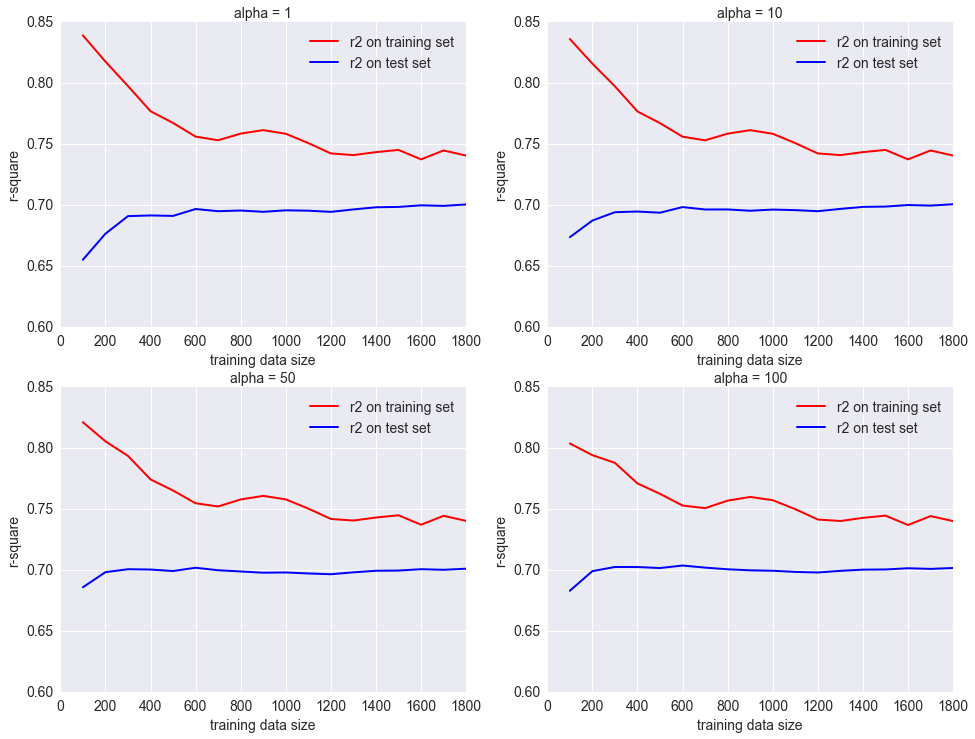

In [17]:
#alpha_list = np.linspace(2,8,4)
#alpha_list = np.logspace(0,1,4)
alpha_list = [1,10,50,100]
data_size = np.arange(100,1900,100)

fig = plt.figure()
fig.set_size_inches(16,12)
for idx,alpha_tmp in enumerate(alpha_list):
    test_score = []
    training_score = []
    for size_tmp in data_size:
        X_train_tmp = X_train3[:size_tmp]
        y_train_tmp = y_train[:size_tmp]
        reg_tmp = linear_model.Ridge(alpha = alpha_tmp)
        reg_tmp.fit(X_train_tmp,y_train_tmp)
        training_score.append(reg_tmp.score(X_train_tmp,y_train_tmp))
        test_score.append(reg_tmp.score(X_test3,y_test))
    plt.subplot(221+idx)
    plt.plot(data_size,training_score,label = 'r2 on training set',color = 'red',linewidth = 2)
    plt.plot(data_size,test_score,label = 'r2 on test set',color = 'blue',linewidth = 2)
    plt.xlabel('training data size',fontsize = 14)
    plt.ylabel('r-square',fontsize = 14)
    plt.title('alpha = '+str(alpha_tmp),fontsize = 14)    
    plt.legend(loc = 'best',fontsize = 14)
    plt.ylim([0.6,0.85])
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
plt.show()
fig.savefig('learning curve.png', dpi=75)

# Step 6 visualize feature weights

In [18]:
features_relavent = X_train3.columns
weights = rr_final.coef_
fw_dict = dict([(features_relavent[i],weights[i]) for i in range(len(weights))])
fw = pd.Series(fw_dict)
#fw.sort(ascending=False)
fw.sort_values(inplace=True,ascending = False)
print fw
#fw.plot(kind = 'bar',color = 'b',alpha = 0.7)

TUITIONFEE_OUT                   0.022693
RET_FT4                          0.022461
COMP_ORIG_YR3_RT                 0.022369
PFTFTUG1_EF                      0.021209
NOT1STGEN_COMP_ORIG_YR8_RT       0.021049
SAT_AVG                          0.019191
NOT1STGEN_WDRAW_ORIG_YR8_RT      0.017462
COMP_ORIG_YR4_RT                 0.015916
D200_4                           0.015593
COMP_ORIG_YR6_RT                 0.014750
DEP_COMP_ORIG_YR3_RT             0.013581
main                             0.013385
CUML_DEBT_P10                    0.013150
HI_INC_COMP_ORIG_YR4_RT          0.007551
WDRAW_4YR_TRANS_YR6_RT          -0.012327
IND_COMP_2YR_TRANS_YR6_RT       -0.013335
FEMALE_WDRAW_4YR_TRANS_YR4_RT   -0.014035
FEMALE_ENRL_ORIG_YR6_RT         -0.016311
WDRAW_2YR_TRANS_YR6_RT          -0.019129
MALE_DEBT_N                     -0.019892
dtype: float64


Make barh plot.

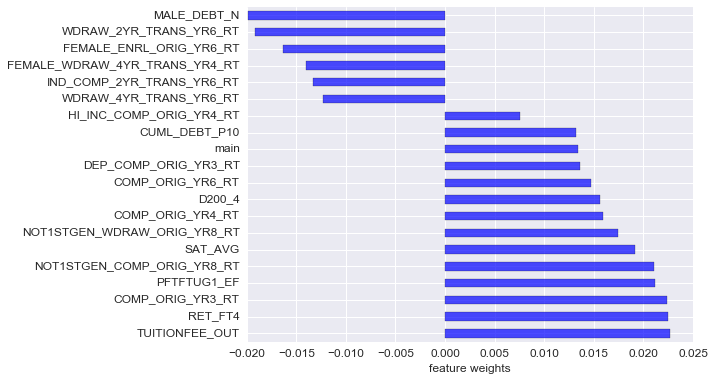

In [19]:
fig = plt.figure()
fig.set_size_inches(8,6)
fw.plot(kind = 'barh',color = 'blue',alpha = 0.7)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('feature weights',fontsize = 12)
fig.savefig('weight.png', dpi=100)